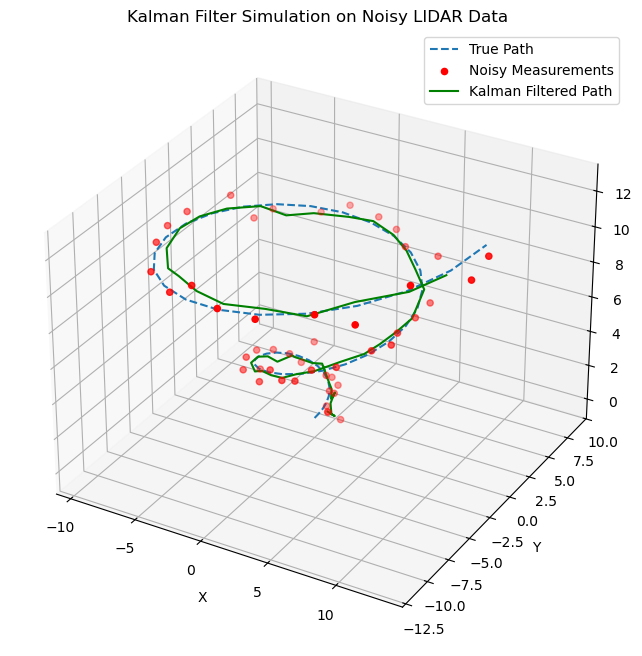

In [12]:
# -----------------------------------------------------
# Proyecto: KallmanSimulation
# Autor: GoldHood
# Name: Martin Verastegui
# Mail: martin.verastegui@gmail.com
# Fecha: 2 de noviembre de 2024
# Licencia: MIT License
# Descripción: Simulación de Kallman apliacadoa  nube de puntos con ruido.
# Repositorio: https://github.com/GoldHood/DynamicMazeAstar
# -----------------------------------------------------
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic LIDAR data with noise
def generate_lidar_data(num_points=50):
    # Generate a spiral in 3D space as the "true" data
    t = np.linspace(0, 4 * np.pi, num_points)
    x_true = t * np.cos(t)
    y_true = t * np.sin(t)
    z_true = t
    data_true = np.vstack((x_true, y_true, z_true)).T
    
    # Add random Gaussian noise to simulate sensor noise
    noise = np.random.normal(0, 0.5, data_true.shape)
    data_noisy = data_true + noise
    return data_true, data_noisy

# Define Kalman filter functions
def kalman_filter_3d(data_noisy, R=0.5**2, Q=0.1):
    """
    Applies Kalman filter to 3D noisy data.
    R: Measurement noise covariance
    Q: Process noise covariance
    """
    num_points = data_noisy.shape[0]
    estimated_data = np.zeros_like(data_noisy)
    
    # Initial estimates
    x_est = data_noisy[0]
    P = np.eye(3)  # Initial state covariance

    for i in range(num_points):
        # Prediction step
        x_pred = x_est  # Since there is no motion model, we assume the position remains the same
        P_pred = P + Q * np.eye(3)
        
        # Measurement update step
        K = P_pred @ np.linalg.inv(P_pred + R * np.eye(3))  # Kalman Gain
        x_est = x_pred + K @ (data_noisy[i] - x_pred)
        P = (np.eye(3) - K) @ P_pred  # Updated covariance
        
        # Store estimated position
        estimated_data[i] = x_est
    
    return estimated_data

# Generate data and apply Kalman filter
data_true, data_noisy = generate_lidar_data(num_points=50)
data_filtered = kalman_filter_3d(data_noisy)

# Plot the results
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data_true[:, 0], data_true[:, 1], data_true[:, 2], label='True Path', linestyle='--')
ax.scatter(data_noisy[:, 0], data_noisy[:, 1], data_noisy[:, 2], color='r', label='Noisy Measurements')
ax.plot(data_filtered[:, 0], data_filtered[:, 1], data_filtered[:, 2], color='g', label='Kalman Filtered Path')

# Labels and legend
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
ax.set_title("Kalman Filter Simulation on Noisy LIDAR Data")

plt.show()
